# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [123]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from datetime import datetime
import matplotlib.dates as mdates

In [124]:
my_service =Service(executable_path='C:\\Windows\\chromedriver_win32\\chromedriver.exe')
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [125]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [126]:
# Create a Beautiful Soup Object
html = browser.html
mars_facts = soup(html, 'html.parser')

In [127]:
# Extract all rows of data
table_data = mars_facts.find_all('table', class_='table')
table_data

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [128]:
df_try = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
df_mars_try = df_try[0]


In [129]:
# Confirm DataFrame was created successfully
df_mars_try.head()


id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [130]:
# Examine data type of each column
df_mars_try.dtypes


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [131]:
# Change data types for data analysis
df_mars_try["terrestrial_date"] = pd.to_datetime(df_mars_try["terrestrial_date"])

In [132]:
# Confirm type changes were successful by examining data types again
df_mars_try.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [133]:
# 1. How many months are there on Mars?
months_mars = df_mars_try['month'].max()
print(f"There are", months_mars, "months on Mars.")

There are 12 months on Mars.


In [134]:
# 2. How many Martian days' worth of data are there?
martian_days = df_mars_try['sol'].max()
print(f"There are", martian_days, "Martian days' worth of data.")

There are 1977 Martian days' worth of data.


In [138]:
loop_list = []
for x in range(1, 13):
    month_avg_loop = months.get_group(x)['min_temp'].mean()
    loop_list.append(month_avg_loop)
print(f"The average low temperature for month", x, "is", month_avg_loop)
print(loop_list)

The average low temperature for month 12 is -74.45180722891567
[-77.16091954022988, -79.93258426966293, -83.30729166666667, -82.74742268041237, -79.30872483221476, -75.29931972789116, -72.28169014084507, -68.38297872340425, -69.17164179104478, -71.98214285714286, -71.98550724637681, -74.45180722891567]


In [145]:
# 3. What is the average low temperature by month?
months = df_mars_try.groupby('month')
for x in range(12):
    print(f"The average low temperature for month", x +1, "is", loop_list[x])


The average low temperature for month 1 is -77.16091954022988
The average low temperature for month 2 is -79.93258426966293
The average low temperature for month 3 is -83.30729166666667
The average low temperature for month 4 is -82.74742268041237
The average low temperature for month 5 is -79.30872483221476
The average low temperature for month 6 is -75.29931972789116
The average low temperature for month 7 is -72.28169014084507
The average low temperature for month 8 is -68.38297872340425
The average low temperature for month 9 is -69.17164179104478
The average low temperature for month 10 is -71.98214285714286
The average low temperature for month 11 is -71.98550724637681
The average low temperature for month 12 is -74.45180722891567


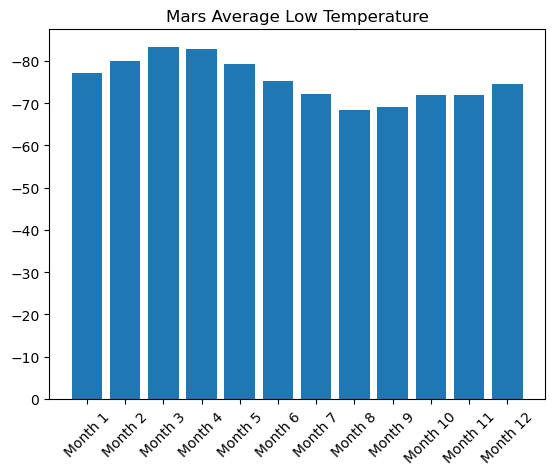

In [146]:
# Plot the average temperature by month
names = ["Month 1", "Month 2", "Month 3", "Month 4", "Month 5", "Month 6", "Month 7", "Month 8",
        "Month 9", "Month 10", "Month 11", "Month 12"]
plt.bar(names, loop_list)
plt.xticks(names, rotation = 45)
plt.title("Mars Average Low Temperature")
plt.gca().invert_yaxis()
plt.show()

In [147]:
# Identify the coldest and hottest months in Curiosity's location
df_list = pd.DataFrame(plot_month, names)
#df_list_2 = df_list.reset_index()
hot_cold = df_list.rename(columns={df_list.columns[0]: 'Temp'})
hot = hot_cold['Temp'].idxmax()
cold = hot_cold['Temp'].idxmin()
print(f"The coldest month is", cold,",the hottest month is", hot)

The coldest month is Month 3 ,the hottest month is Month 8


In [148]:
# 4. Average pressure by Martian month
pressure_list = []
for x in range(1, 13):
    month_avg = months.get_group(x)['pressure'].mean()
    pressure_list.append(month_avg)
#mon_list = month_list.tolist()
print(pressure_list)


[862.4885057471264, 889.4550561797753, 877.3229166666666, 806.3298969072165, 748.5570469798657, 745.0544217687075, 795.1056338028169, 873.8297872340426, 913.3059701492538, 887.3125, 857.0144927536232, 842.156626506024]


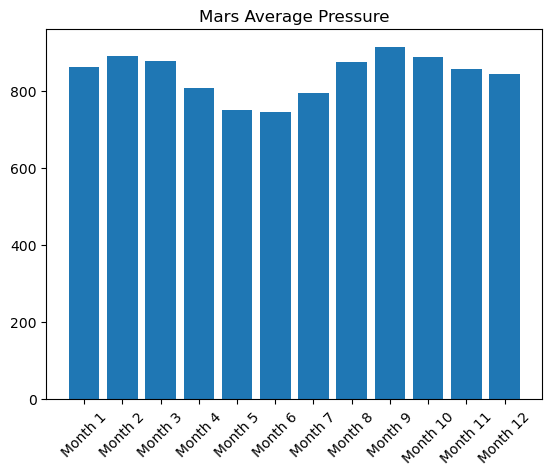

The month with the lowest pressure is month 6 and the month with the highest pressure is month 9


In [149]:
# Plot the average pressure by month
plt.bar(names, pressure_list)
plt.xticks(names, rotation = 45)
plt.title("Mars Average Pressure")
plt.show()
print("The month with the lowest pressure is month 6 and the month with the highest pressure is month 9")

The plot shows the distance form peak tp peak is alittle less than 2 years which would be less than 730 earth days


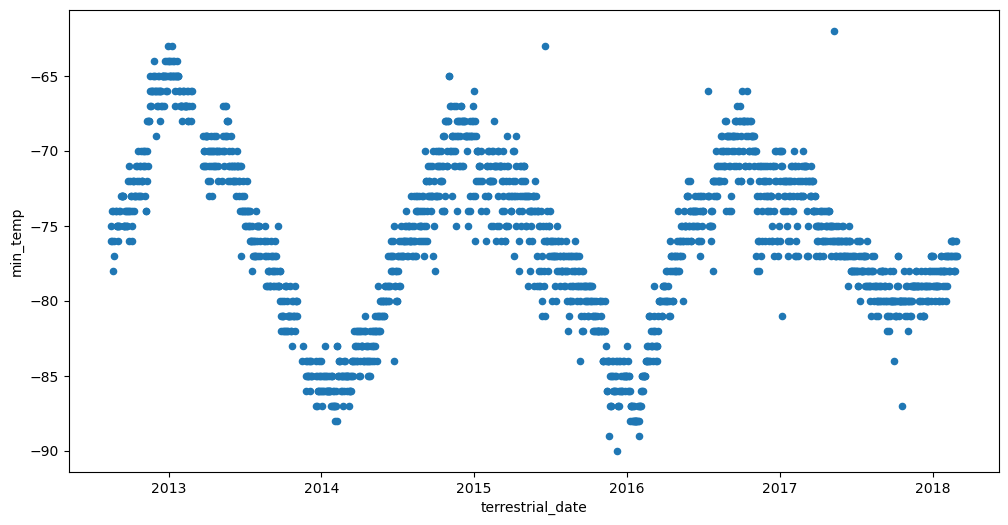

In [150]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = df_mars_try.loc[:,["terrestrial_date", "min_temp"]]
ax = earth_days.plot(x="terrestrial_date", y = "min_temp", kind = "scatter", figsize=(12, 6))
ax.xaxis.set
print("The plot shows the distance form peak tp peak is alittle less than 2 years which would be less than 730 earth days")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [151]:
# Write the data to a CSV
df_mars_try.to_csv('mars_weather.csv', index=False, encoding='utf-8', date_format='%Y-%m-%d')

In [152]:
browser.quit()